In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm
sns.set()

In [2]:
df_ice = pd.read_csv("icecream.csv", encoding = "shift-jis", header=1)

In [3]:
df_ice.dtypes

年          int64
月          int64
アイスクリーム    int64
dtype: object

In [4]:
df_ice

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
5,2003,6,730
6,2003,7,821
7,2003,8,1057
8,2003,9,724
9,2003,10,430


In [5]:
df_ice.set_index(pd.date_range('2003-01-01', '2012-12-31', freq='M'), inplace=True)
df_ice.head()

,年,月,アイスクリーム
2003-01-31,2003,1,331
2003-02-28,2003,2,268
2003-03-31,2003,3,365
2003-04-30,2003,4,492
2003-05-31,2003,5,632


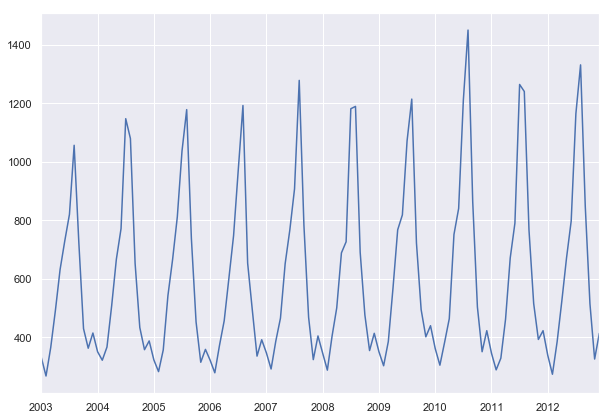

In [6]:
#　原系列
df_ice["アイスクリーム"].plot(figsize=(10,7))

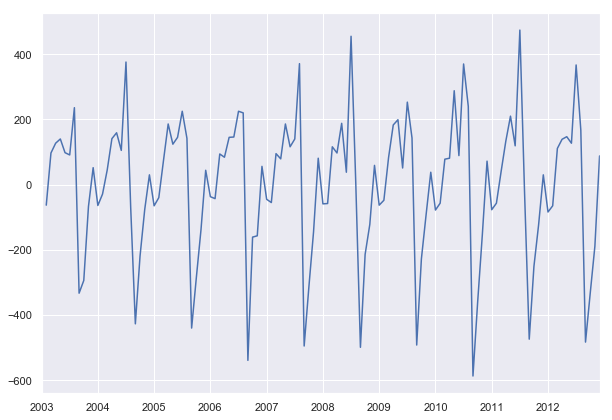

In [7]:
# 差分系列
df_ice["アイスクリーム"].diff().plot(figsize=(10,7))

In [8]:
#　単位根検定を行う
#　帰無仮説：単位根である、対立仮説：単位根でない(タプル内の2番目の項がp値)　→　全て帰無仮説を棄却出来ない、つまり単位根過程でないとは言えない
from statsmodels.tsa import stattools

y = df_ice["アイスクリーム"]

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.308955850882182, 0.1692244861968732, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484143)
ct:
(-1.7145601999710613, 0.7444294601457631, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694246, 0.8583259363632654, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.6310949179759107, 0.9751761218376868, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328063)


In [9]:
#　データを1次階差系列にする
y_diff = y.diff()[:100].dropna()

In [10]:
#再度、単位根検定を行う　→　全て帰無仮説を棄却出来た、つまり単位根過程でないと言える（定常過程であると言える）

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y_diff[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y_diff[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y_diff[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y_diff[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-20.494138790574038, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214955)
ct:
(-20.51282538674092, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902558)
c:
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415187)
nc:
(-20.33772445910238, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068396)


In [11]:
#1階差系列が定常過程になることが分かったので、1階差系列を使ってARモデルを構築する
from statsmodels.tsa import ar_model

model = ar_model.AR(y_diff)

In [12]:
# AICを使って次数を決定する　→　AICは低いほど良い（次数20まで調べる）

AIC = []

for i in range(1,21):
    result = model.fit(maxlag = i)
    AIC.append(result.aic)
    print("lag = ",i,"AIC = ",result.aic)

lag =  1 AIC =  10.623349835083612
lag =  2 AIC =  10.605625887136187
lag =  3 AIC =  10.631794365499909
lag =  4 AIC =  10.653968819566964
lag =  5 AIC =  10.639020494849978
lag =  6 AIC =  10.497805079154896
lag =  7 AIC =  10.501645560833579
lag =  8 AIC =  10.347418412668333
lag =  9 AIC =  10.145773136713263
lag =  10 AIC =  9.54739319159168
lag =  11 AIC =  8.688494352586085
lag =  12 AIC =  8.726168706454176
lag =  13 AIC =  8.749080458269447
lag =  14 AIC =  8.787463716774607
lag =  15 AIC =  8.822181088075927
lag =  16 AIC =  8.861619646480914
lag =  17 AIC =  8.900710667979506
lag =  18 AIC =  8.712739176754758
lag =  19 AIC =  8.74636247304398
lag =  20 AIC =  8.766450545272324


<Figure size 1440x720 with 0 Axes>

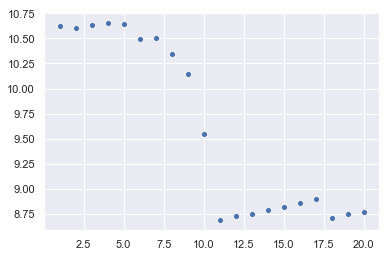

<Figure size 1440x720 with 0 Axes>

In [13]:
#ラグが11の時AICが最小になることが分かる　→　11時点までのデータとytは相関が強いことが分かる

sns.scatterplot(x=range(1,21), y=AIC,)
plt.figure(figsize=(20, 10))

In [14]:
# fitの時にic = "aic"を選択すると自動でaicが最小になるモデルを選んでくれる
result11 =  model.fit(maxlag = 12 , ic = "aic") #lag12まで探索

In [15]:
#選択されたラグの次数を表示
result11.k_ar

11

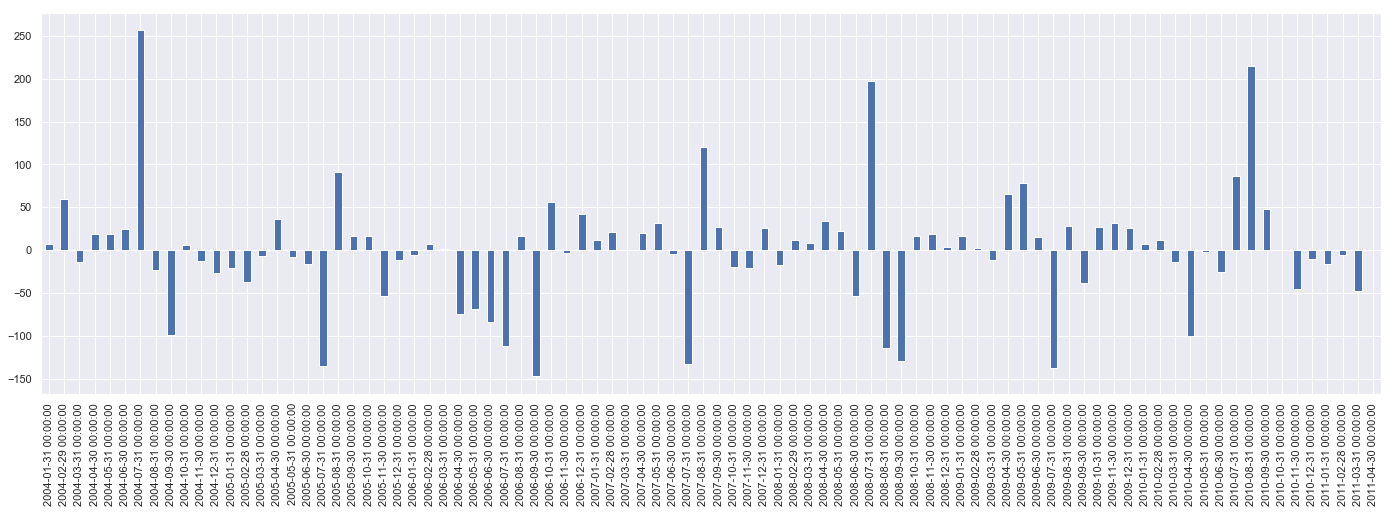

In [16]:
#残渣
result11.resid

#残渣のplot。y_diffは初めの100個のデータとしたから2011/4までのデータしかない
result11.resid.plot(kind='bar',figsize=(24,7))

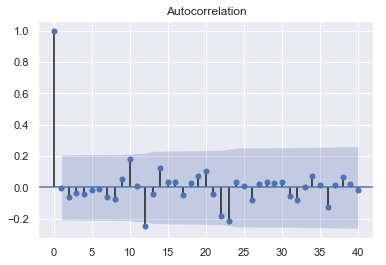

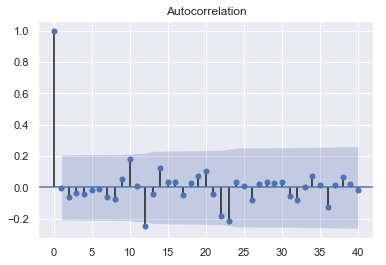

In [20]:
# AR(11)モデル残渣の自己相関を確認する 
# →　ラグ12の偏自己相関は有意に残っており、AR（11）モデルで１次階差系列にある12ヶ月の循環成分を十分に表現出来ていないことが分かる
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(result11.resid , lags = 40)

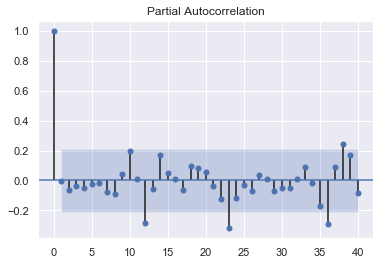

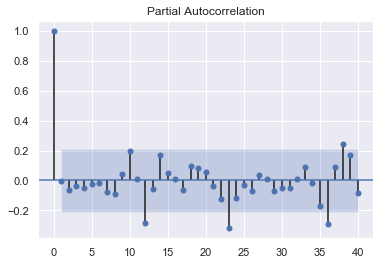

In [21]:
# AR(11)モデル残渣の偏自己相関を確認する 
# →　ラグ12の偏自己相関は有意に残っており、AR（11）モデルで１次階差系列にある12ヶ月の循環成分を十分に表現出来ていないことが分かる

tsaplots.plot_pacf(result11.resid , lags = 40)

In [33]:
# かばん検定を行う：結果、ラグ12までの自己相関がすべて0という帰無仮説は棄却できない（すべて0の可能性もある）
lbvalues, pvalues = sm.stats.acorr_ljungbox(result11.resid,lags=12)

lag = 1
for lb, p in zip(lbvalues, pvalues):
    print(lag, lb, p)
    lag += 1

1 0.0009664822522420811 0.9751991222636242
2 0.3642040561092253 0.8335162940312826
3 0.4933531099400208 0.920349258940756
4 0.6845101777478859 0.9532253044578529
5 0.7077872337513934 0.9825385611642915
6 0.7144745508086279 0.9941733454404764
7 1.0978139729388714 0.9930926729755412
8 1.6154554388984672 0.9906206834421454
9 1.9084259421298622 0.9928342547544802
10 5.331156218428221 0.867987612860147
11 5.339768299628369 0.9136021958012397
12 11.574937337219982 0.48039161607991343


/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


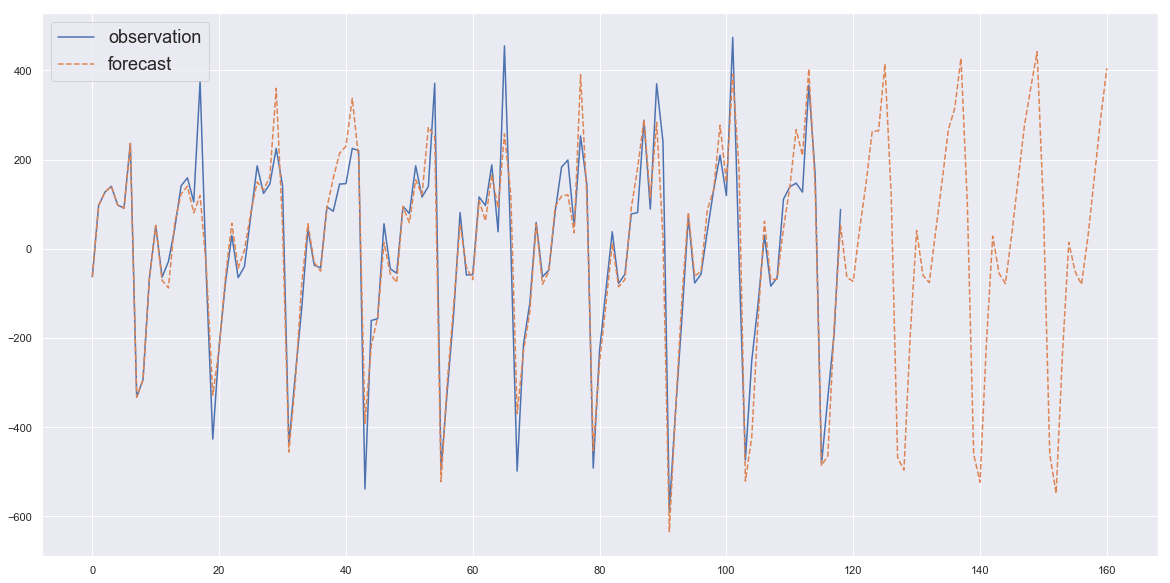

In [31]:
# 原系列の表示
plt.figure(figsize = (20,10))

plt.plot(df_ice["アイスクリーム"].diff().dropna().values, label = "observation")

# 1時点から11時点まではfitting結果がないため原系列を使用する
plt.plot(np.hstack([df_ice["アイスクリーム"].diff().dropna().values[:11],#1-10はfitting値がないため原系列を使う
                    result11.fittedvalues,# fitting値11-98はfittingの結果
                  result11.predict(100-1,160,dynamic = True)]),# 99-160は予測結果
        "--" , label = "forecast")

plt.legend(loc = "upper left",fontsize = 18)

In [85]:
np.hstack([df_ice["アイスクリーム"][:11],result11.fittedvalues])

array([ 331.        ,  268.        ,  365.        ,  492.        ,
        632.        ,  730.        ,  821.        , 1057.        ,
        724.        ,  430.        ,  363.        ,  -70.69852362,
        -88.13305802,   58.34035377,  122.5976527 ,  140.21478832,
         80.34345175,  119.64453505,  -45.15645215, -328.29139998,
       -224.54173921,  -63.51962847,   57.2502023 ,  -43.80110844,
         -2.9607274 ,   81.20610429,  149.71659113,  132.05351634,
        161.24534003,  359.83764651,   50.8670995 , -456.09691469,
       -301.89982518,  -84.99339591,   56.0324499 ,  -30.8814529 ,
        -50.42002106,   92.10777617,  157.98334298,  214.04251856,
        229.77271329,  337.10856532,  203.76781663, -391.90537971,
       -217.5377948 , -154.07339837,   14.21606605,  -56.75131411,
        -75.81953096,   94.42961151,   58.58831874,  154.72263268,
        121.04347902,  272.73792459,  250.92347634, -522.42206192,
       -295.81149434, -124.46138832,   54.76504185,  -41.28282

In [93]:
result11.predict(100-1,120)

2011-05-31    277.247254
2011-06-30    149.111601
2011-07-31    391.112379
2011-08-31    177.088777
2011-09-30   -521.335480
2011-10-31   -422.408521
2011-11-30   -158.876845
2011-12-31     61.674697
2012-01-31    -69.436864
2012-02-29    -68.057565
2012-03-31     45.197258
2012-04-30    137.472588
2012-05-31    267.168629
2012-06-30    209.151406
2012-07-31    403.364686
2012-08-31    139.636030
2012-09-30   -486.161061
2012-10-31   -464.554839
2012-11-30   -173.992351
2012-12-31     52.116029
2013-01-31    -64.457941
2013-02-28    -73.124484
Freq: M, dtype: float64

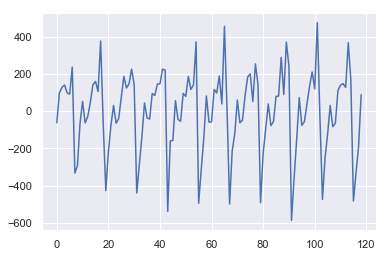

In [105]:
plt.plot(df_ice["アイスクリーム"].diff().dropna().values, label = "observation")

In [108]:
np.hstack([df_ice["アイスクリーム"][:11].diff(),
                    result11.fittedvalues,
                  result11.predict(100-1,120,dynamic = True)])

array([          nan,  -63.        ,   97.        ,  127.        ,
        140.        ,   98.        ,   91.        ,  236.        ,
       -333.        , -294.        ,  -67.        ,  -70.69852362,
        -88.13305802,   58.34035377,  122.5976527 ,  140.21478832,
         80.34345175,  119.64453505,  -45.15645215, -328.29139998,
       -224.54173921,  -63.51962847,   57.2502023 ,  -43.80110844,
         -2.9607274 ,   81.20610429,  149.71659113,  132.05351634,
        161.24534003,  359.83764651,   50.8670995 , -456.09691469,
       -301.89982518,  -84.99339591,   56.0324499 ,  -30.8814529 ,
        -50.42002106,   92.10777617,  157.98334298,  214.04251856,
        229.77271329,  337.10856532,  203.76781663, -391.90537971,
       -217.5377948 , -154.07339837,   14.21606605,  -56.75131411,
        -75.81953096,   94.42961151,   58.58831874,  154.72263268,
        121.04347902,  272.73792459,  250.92347634, -522.42206192,
       -295.81149434, -124.46138832,   54.76504185,  -41.28282

In [100]:
df_ice["アイスクリーム"]

2003-01-31     331
2003-02-28     268
2003-03-31     365
2003-04-30     492
2003-05-31     632
2003-06-30     730
2003-07-31     821
2003-08-31    1057
2003-09-30     724
2003-10-31     430
2003-11-30     363
2003-12-31     415
2004-01-31     351
2004-02-29     322
2004-03-31     367
2004-04-30     508
2004-05-31     667
2004-06-30     772
2004-07-31    1148
2004-08-31    1080
2004-09-30     653
2004-10-31     434
2004-11-30     358
2004-12-31     388
2005-01-31     323
2005-02-28     283
2005-03-31     357
2005-04-30     543
2005-05-31     667
2005-06-30     812
              ... 
2010-07-31    1211
2010-08-31    1451
2010-09-30     864
2010-10-31     504
2010-11-30     351
2010-12-31     423
2011-01-31     346
2011-02-28     289
2011-03-31     329
2011-04-30     462
2011-05-31     672
2011-06-30     791
2011-07-31    1265
2011-08-31    1241
2011-09-30     767
2011-10-31     516
2011-11-30     393
2011-12-31     423
2012-01-31     339
2012-02-29     274
2012-03-31     385
2012-04-30  

In [127]:
result11.fittedvalues

2004-01-31    -70.698524
2004-02-29    -88.133058
2004-03-31     58.340354
2004-04-30    122.597653
2004-05-31    140.214788
2004-06-30     80.343452
2004-07-31    119.644535
2004-08-31    -45.156452
2004-09-30   -328.291400
2004-10-31   -224.541739
2004-11-30    -63.519628
2004-12-31     57.250202
2005-01-31    -43.801108
2005-02-28     -2.960727
2005-03-31     81.206104
2005-04-30    149.716591
2005-05-31    132.053516
2005-06-30    161.245340
2005-07-31    359.837647
2005-08-31     50.867099
2005-09-30   -456.096915
2005-10-31   -301.899825
2005-11-30    -84.993396
2005-12-31     56.032450
2006-01-31    -30.881453
2006-02-28    -50.420021
2006-03-31     92.107776
2006-04-30    157.983343
2006-05-31    214.042519
2006-06-30    229.772713
                 ...    
2008-11-30   -140.993924
2008-12-31     55.095269
2009-01-31    -79.627265
2009-02-28    -50.802124
2009-03-31     94.423522
2009-04-30    117.990200
2009-05-31    121.099217
2009-06-30     35.785619
2009-07-31    390.204544


In [130]:
result11.predict(100-1,160,dynamic = True)

2011-05-31    277.247254
2011-06-30    149.111601
2011-07-31    391.112379
2011-08-31    177.088777
2011-09-30   -521.335480
2011-10-31   -422.408521
2011-11-30   -158.876845
2011-12-31     61.674697
2012-01-31    -69.436864
2012-02-29    -68.057565
2012-03-31     45.197258
2012-04-30    137.472588
2012-05-31    267.168629
2012-06-30    209.151406
2012-07-31    403.364686
2012-08-31    139.636030
2012-09-30   -486.161061
2012-10-31   -464.554839
2012-11-30   -173.992351
2012-12-31     52.116029
2013-01-31    -64.457941
2013-02-28    -73.124484
2013-03-31     43.129149
2013-04-30    143.736564
2013-05-31    263.494157
2013-06-30    264.243033
2013-07-31    414.570951
2013-08-31    115.866550
2013-09-30   -468.351492
2013-10-31   -496.763359
                 ...    
2014-01-31    -59.805711
2014-02-28    -76.091549
2014-03-31     38.141899
2014-04-30    149.071866
2014-05-31    266.712930
2014-06-30    314.406321
2014-07-31    427.199398
2014-08-31    100.326990
2014-09-30   -461.321500


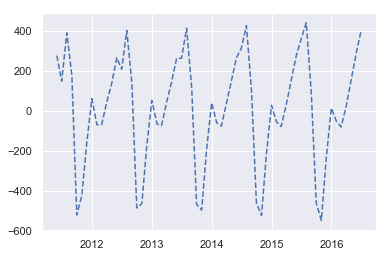

In [132]:
plt.plot(result11.predict(100-1,160,dynamic = True),"--" , label = "forecast")

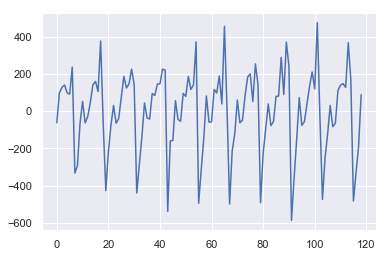

In [134]:
plt.plot(df_ice["アイスクリーム"].diff().dropna().values, label = "observation")